<a href="https://colab.research.google.com/github/AlinaMidhath/ML-projects/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Customer Segmentation using KMeans Clustering***



K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.

**Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [2]:
cs = pd.read_csv('/content/Mall_Customers[1].csv')
cs

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
cs.shape

(200, 5)

In [4]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
cs.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Data Visualization**

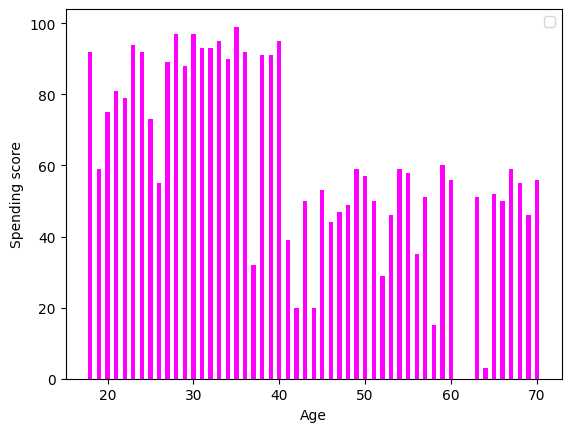

In [6]:
x = cs['Age']
y = cs['Spending Score (1-100)']
plt.xlabel('Age')
plt.ylabel('Spending score')
plt.legend()
plt.bar( x,y  ,color = 'magenta' , width = 0.5)
plt.show()


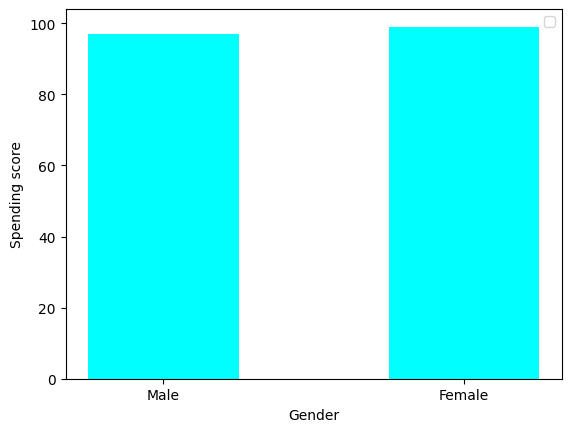

In [7]:
x = cs['Gender']
y = cs['Spending Score (1-100)']
plt.xlabel('Gender')
plt.ylabel('Spending score')
plt.legend()
a = plt.bar( x,y , color = 'cyan' , width = 0.5)
# for index, value in enumerate(x):
#     plt.text(value, index,
#              str(value))
plt.show()


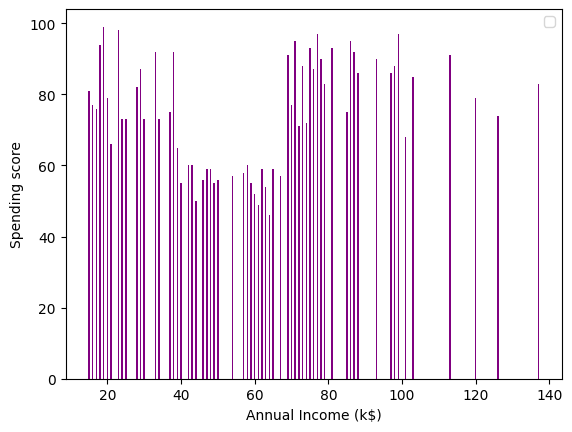

In [17]:
x = cs['Annual Income (k$)']
y = cs['Spending Score (1-100)']
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending score')
plt.legend()
#plt.figure(figsize=(10,6))
plt.bar( x,y , color='purple' ,width = 0.4)
plt.show()


In [20]:
X= cs.iloc[ :  ,[3,4]].values
#X

Choosing correct number of clusters

to choose the no of clusters we use wcss --> within clusters sum of squares

In [10]:
#finding wcss value for different clusters
wcss = []

for i in range(1,11) : # here we are checking wcss value for 10 clusters
  kmeans = KMeans(n_clusters=i , init= 'k-means++' , random_state = 42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

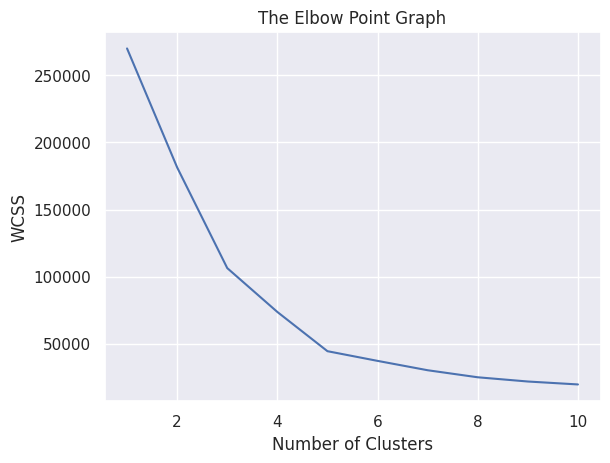

In [18]:
#plot an elbow graph to find out which cluster has minimum value

sns.set()
plt.plot(range(1,11) , wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Point Graph')
plt.show()

Here we have two elbow points at 3 and at 5 (elbow point is the sharp fall in values) .Here we consider the optimum number of clusters as 5 because after 5 there is no sharp fall in the wcss values

**Training the Kmeans clustering model**

In [12]:
 kmeans = KMeans(n_clusters=5 , init= 'k-means++' , random_state = 0)

 #return a label for each cluster based on their data point
 Y = kmeans.fit_predict(X)
 print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Visualizing all the Clusters**

Text(0, 0.5, 'Spending Score')

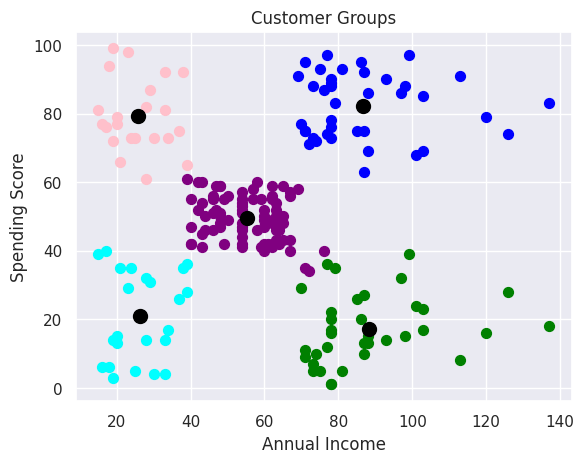

In [19]:
# plotting the clusters
#plt.figure(figsize=(8,8))
plt.scatter(X[Y== 0,0] , X[Y== 0,1] , s = 50, c ='green' , label = 'Cluster1')
plt.scatter(X[Y== 1,0] , X[Y== 1,1] , s = 50, c ='purple' , label = 'Cluster2')
plt.scatter(X[Y== 2,0] , X[Y== 2,1] , s = 50, c ='blue' , label = 'Cluster3')
plt.scatter(X[Y== 3,0] , X[Y== 3,1] , s = 50, c ='pink' , label = 'Cluster4')
plt.scatter(X[Y== 4,0] , X[Y== 4,1] , s = 50, c ='cyan' , label = 'Cluster5')

#plotting the centroid
plt.scatter(kmeans.cluster_centers_[: , 0], kmeans.cluster_centers_[: , 1] , s=100, c="black", label ='Centroid')

plt.title("Customer Groups")
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')